<a href="https://colab.research.google.com/github/7sr7/Projects-in-AI-and-ML---HW2/blob/main/Silvestre_Projs_in_AI_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silvestre Ronin

Professor Mushtaque

PROJECTS IN AI & MACHINE LRNG - CSCI 4170 - 01

2025 06 05

TASK0 START


The following task is copied directly from hw1 (importing the dataset and data manipulation directly from hw1...) as per the hw requirements "In this homework, you will solve the same problem as homework 1 using a different machine learning technique"


The following link is the dataset i have chosen:

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [94]:
# importing required libraries...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel

import time
import warnings
warnings.filterwarnings("ignore")

In [95]:
# mounting to google drive...
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# reading data set...
data = pd.read_csv('/content/drive/MyDrive/breastCancerData.csv')

In [97]:
# viewing the first few rows of the data...
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [98]:
# determining data size....
data.shape

(569, 33)

In [99]:
# checking missing values...
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [100]:
# so the dataset i am using characterizes breast cancer into "benign" (0) or "malignant" (1)...

# making a new column that will be my binary output...
data['isMalignant'] = data['diagnosis'].map({'B': 0, 'M': 1})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,isMalignant
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [101]:
# general information about the dataset...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [102]:
# statistics of the dataset (numeric columns)...
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,isMalignant
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN,1.000000


In [103]:
# statistics of the dataset (categorical columns)...
data.describe(include=['O'])

,diagnosis
count,569
unique,2
top,B
freq,357


In [104]:
# which columns have a missing value...?
data.isnull().any(axis=0)

,0
id,False
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


In [105]:
# dropping weird column...
data = data.drop(columns = "Unnamed: 32")

In [106]:
# this shows me how each column is correlated to the other ones...
dataNum = data.select_dtypes(include='number')
dataNum.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,isMalignant
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


In [107]:
# using VIF to determine highly correlated variables...
X = data.select_dtypes(include='number')

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                    feature           VIF
0                        id      1.164216
1               radius_mean  63793.192688
2              texture_mean    251.518366
3            perimeter_mean  58217.366304
4                 area_mean   1305.768648
5           smoothness_mean    393.529064
6          compactness_mean    201.730144
7            concavity_mean    158.181944
8       concave points_mean    154.937507
9             symmetry_mean    184.545781
10   fractal_dimension_mean    654.926579
11                radius_se    237.908015
12               texture_se     24.758797
13             perimeter_se    211.445554
14                  area_se     73.614728
15            smoothness_se     26.566711
16           compactness_se     45.010653
17             concavity_se     33.691366
18        concave points_se     54.424312
19              symmetry_se     37.224665
20     fractal_dimension_se     27.575138
21             radius_worst   9965.925338
22            texture_worst    343

In [108]:
# according to my own research, VIF >= 10 already suggests "serious multicollinearity"...
# as shown from the results above, it seems there is already a lot of correlation between the data.
# this intuitively makes sense, given that a lot of these features seem to represent mathematical measurements of similar areas..?

# source used:https://medium.com/@ajayverma23/understanding-vif-what-it-is-and-why-its-needed-c24125b5c73f

# thus, we seek to reduce highly correlated variables...
if True:
  # data = data.drop(columns = ['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'texture_worst', 'smoothness_worst', 'compactness_worst','concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis = 1)
  # data = data.drop(columns = ['radius_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean', 'symmetry_mean', 'fracftal_dimension_mean','radius_se','perimeter_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'], axis = 1)

  for i in vif_data.index:
    # dropping all columns with VIF over 100 just since I feared that if I ruled out based on VIF >= 10, then I wouldn't be left with many features...
    if vif_data['VIF'][i] >= 100:
      # print(vif_data['feature'][i])
      data = data.drop(columns = [vif_data['feature'][i]], axis = 1)

else:
  test = data.drop(columns = ['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'texture_worst', 'smoothness_worst', 'compactness_worst','concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], axis = 1)

In [109]:
# rereunning VIF with the highly correlated columns removed...
# the reason i decided not to remove some of the columns that have VIF >= 10 at this point is because i wanted to make sure i still had several features left...
# we can see though that the dataset is now significantly better in terms of less correlation between variables, which is favorable...

X = data.select_dtypes(include='number')

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0                     id   1.117091
1             texture_se   7.255690
2                area_se   2.883104
3          smoothness_se   9.152182
4         compactness_se  16.020149
5           concavity_se   9.160359
6      concave points_se  14.435668
7            symmetry_se   9.072459
8   fractal_dimension_se  11.128027
9        concavity_worst   9.058757
10           isMalignant   4.236340


In [110]:
# is the data imbalanced...?
data.isMalignant.value_counts(normalize=True)

,proportion
isMalignant,
0,0.627417
1,0.372583


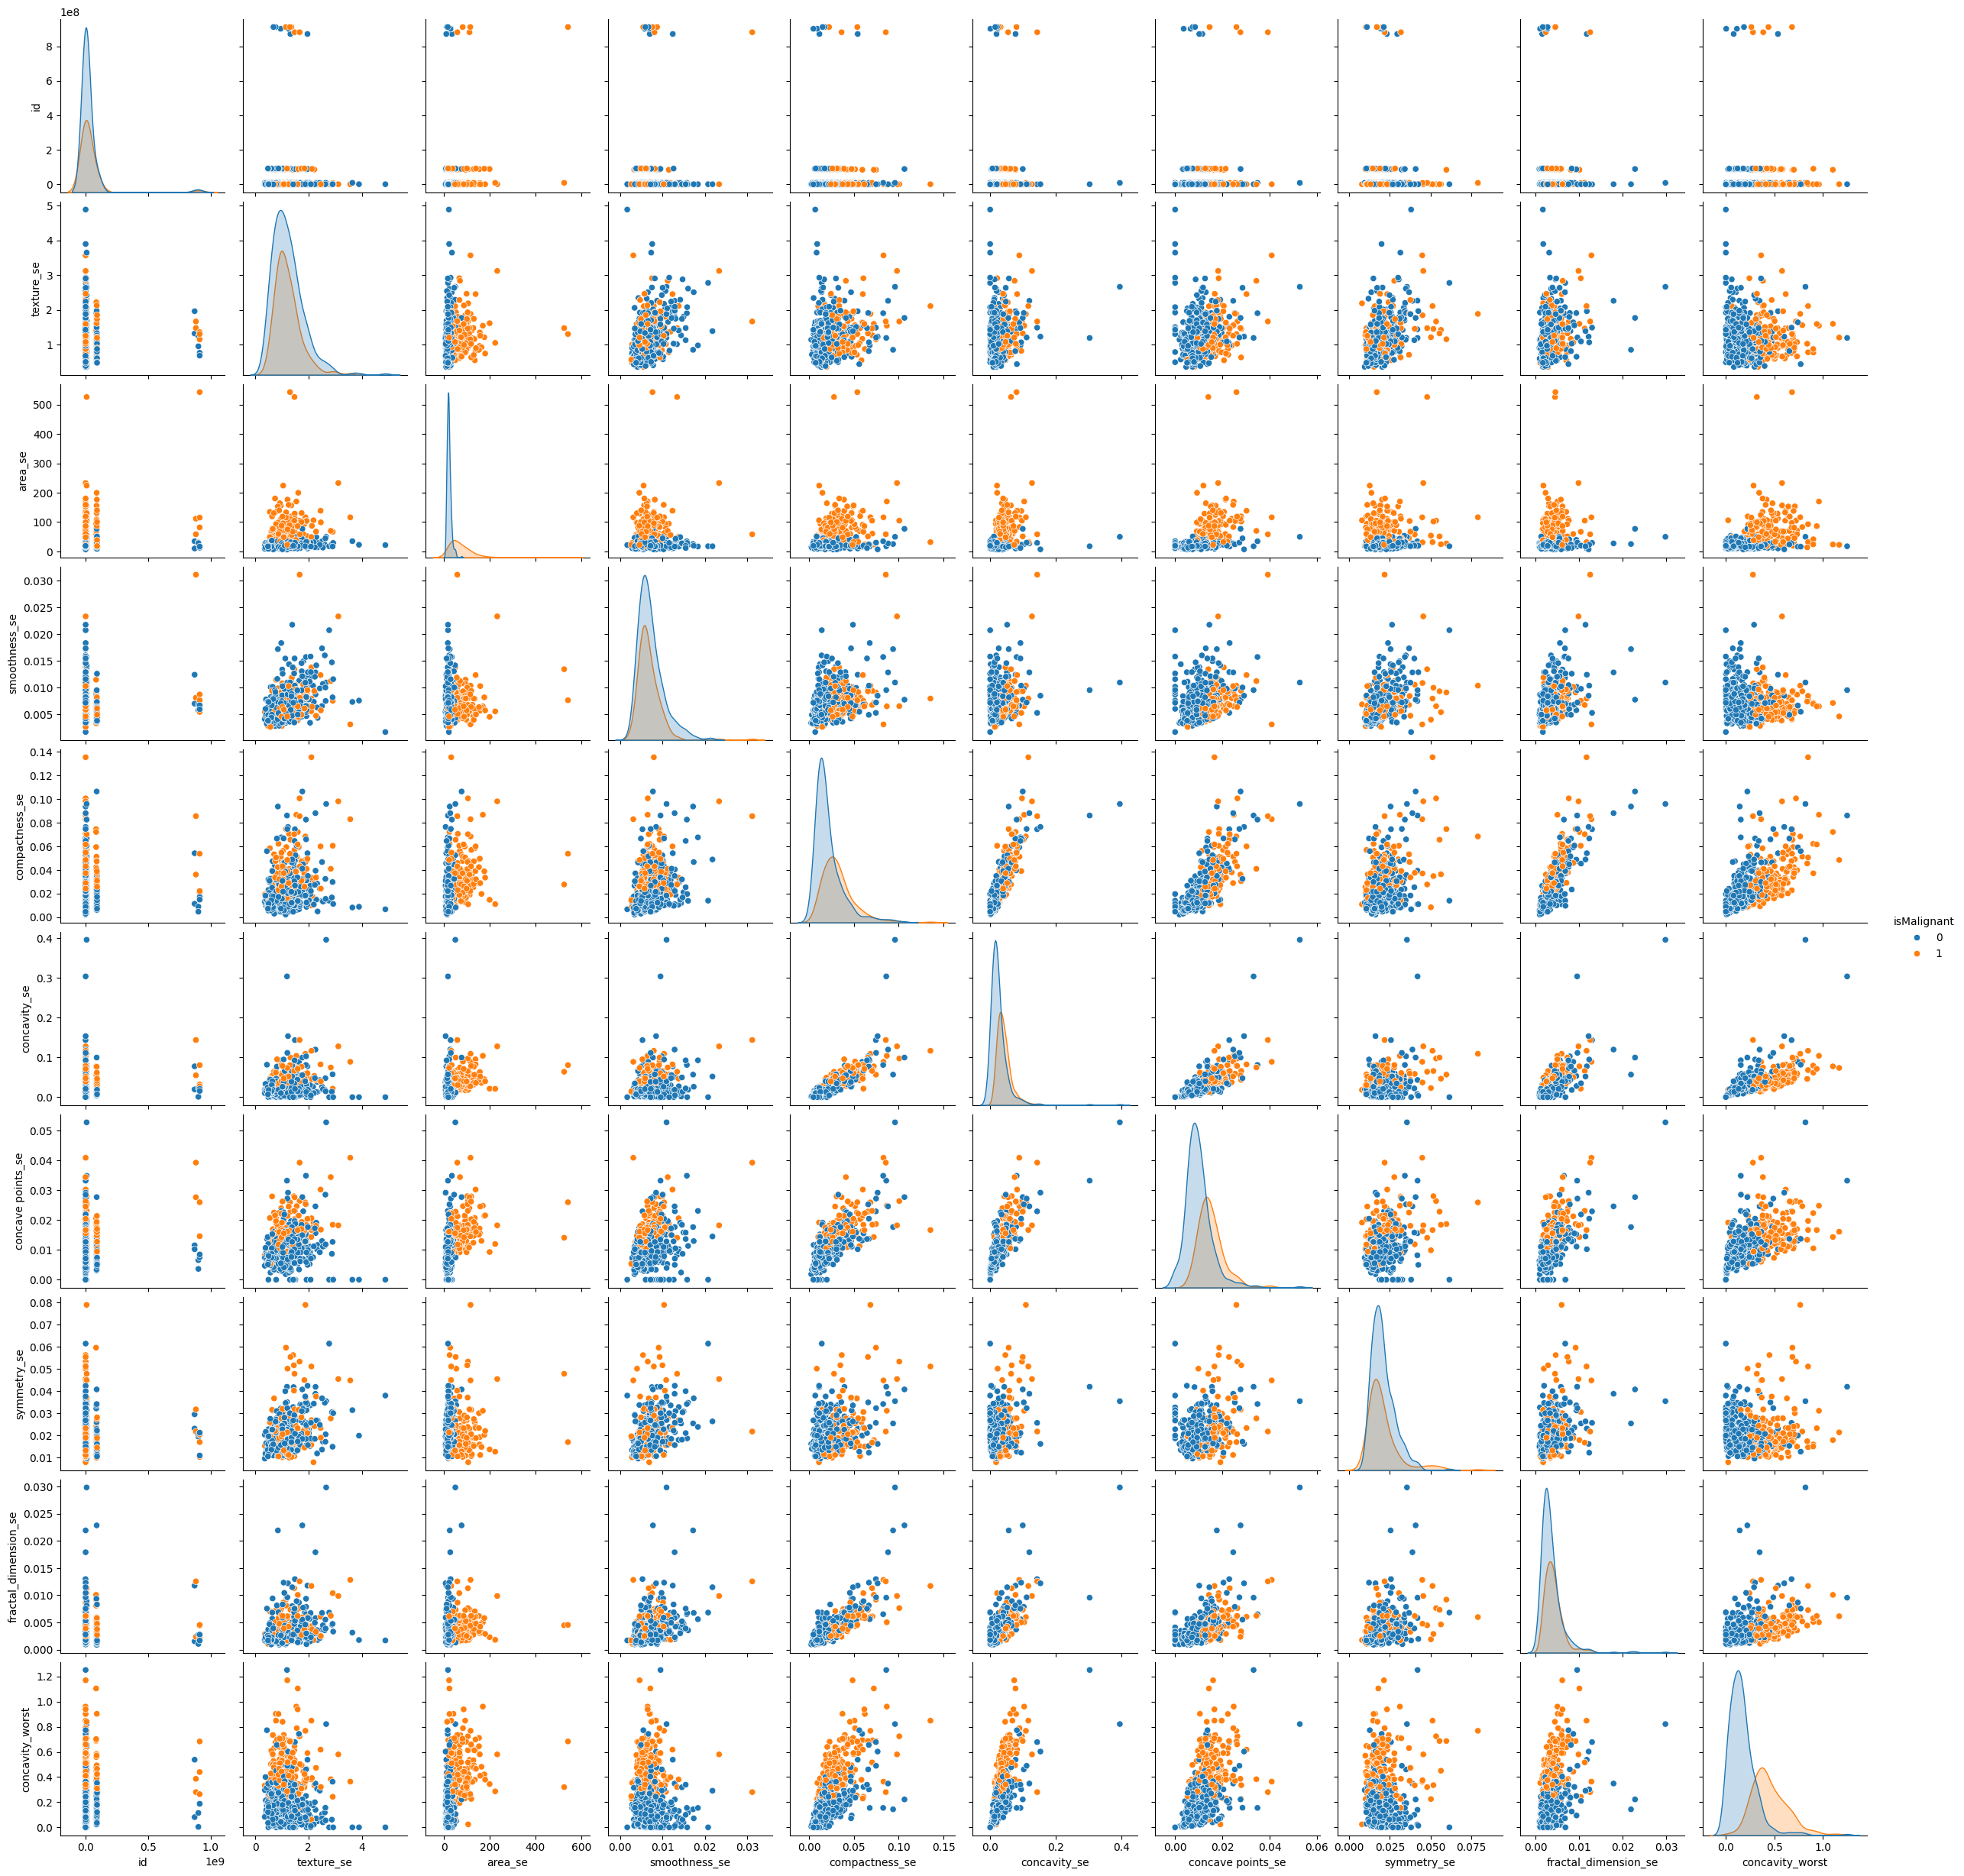

In [111]:
# ploting pairwise relationships in the dataset...
sns.pairplot(data, hue='isMalignant')

<Axes: >

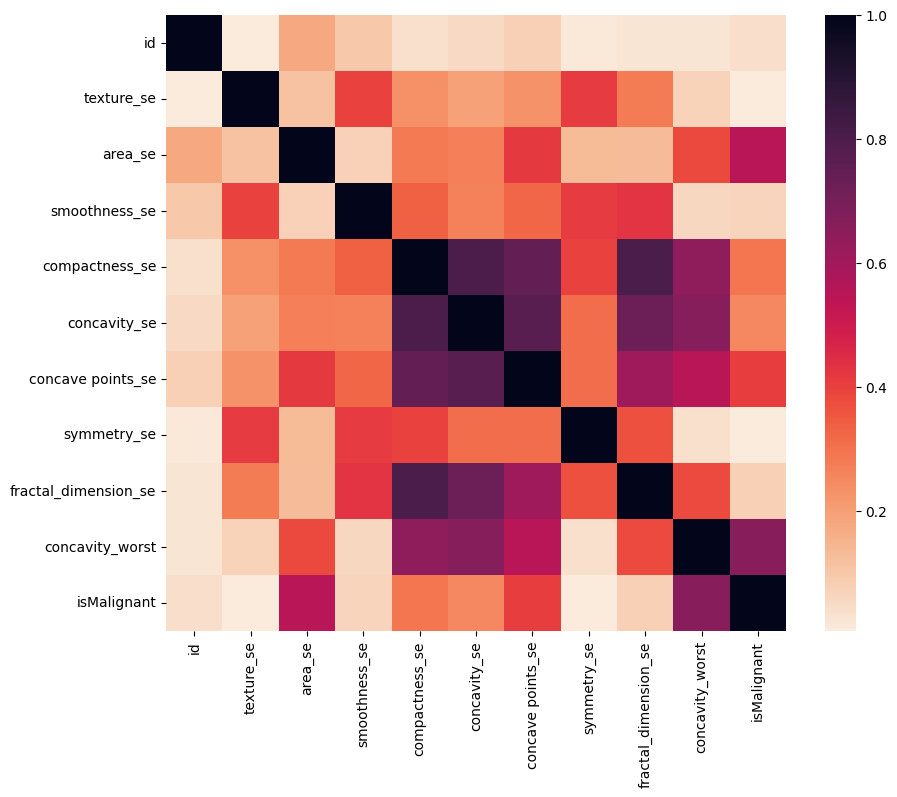

In [112]:
# ploting heatmap of the dataset...

dataNum = data.select_dtypes(include='number')
correlatedData = dataNum.corr()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlatedData.abs(),annot=False, ax=ax, cmap='rocket_r')


In [113]:
# defining sigmoid function and other variables required for logisitc regression...
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

# excluding "y" column for X matrix...
tmp = data.drop(columns = ['isMalignant'])
dataNum = tmp.select_dtypes(include='number')
X = dataNum.values

# standardizing...
avg, stdev = X.mean(), X.std()
X = (X - avg) / stdev

# normalizing...
min, max = X.min(), X.max()
X = (X - min) / (max - min)

Y = data['isMalignant'].values.reshape(-1,1)
n = X.shape[1]
# w = np.zeros(shape=(n,1))
w = np.random.rand(n,1)
b = 0

TASK1 START...

1.1...

The module that I used to implement my decision tree is the following:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [114]:
# divide data into train and test sets...
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Parameter Settings 1:

setting depth to 3...

In [115]:
decisionTree = DecisionTreeClassifier(max_depth=3, random_state=45, splitter = "best")
decisionTree.fit(X_train, y_train)

y_pred = decisionTree.predict(X_test)

In [116]:
# confusion matrix and other evaluation metrics...
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[67  4]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



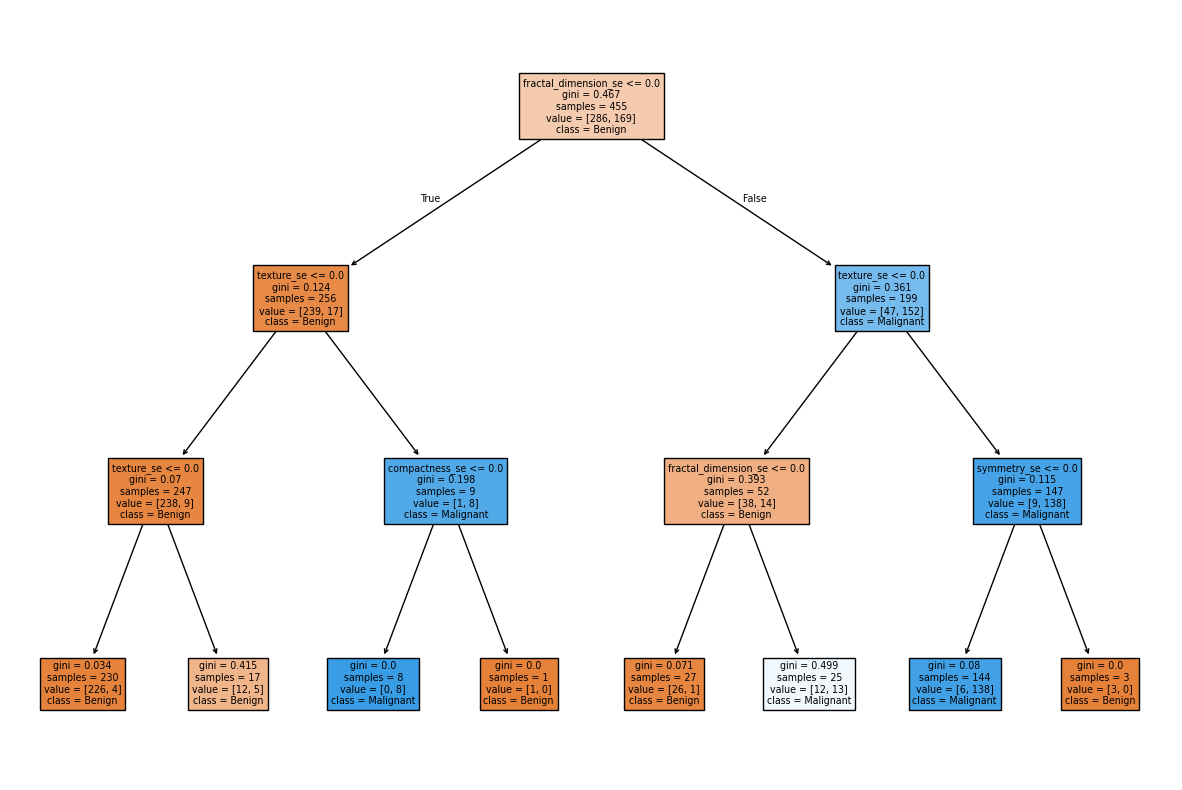

In [117]:
# plotting...
tmp = data.drop(columns = ['isMalignant'])

allFeatureNames = tmp.columns

plt.figure(figsize=(15, 10))
plot_tree(decisionTree, filled=True, feature_names=allFeatureNames, class_names=["Benign", "Malignant"])
plt.show()


Parameter Settings 2:

setting depth to 4...

In [118]:
decisionTree = DecisionTreeClassifier(max_depth=4, random_state=45, splitter = "best")
decisionTree.fit(X_train, y_train)

y_pred = decisionTree.predict(X_test)

In [119]:
# confusion matrix and other evaluation metrics...
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[67  4]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



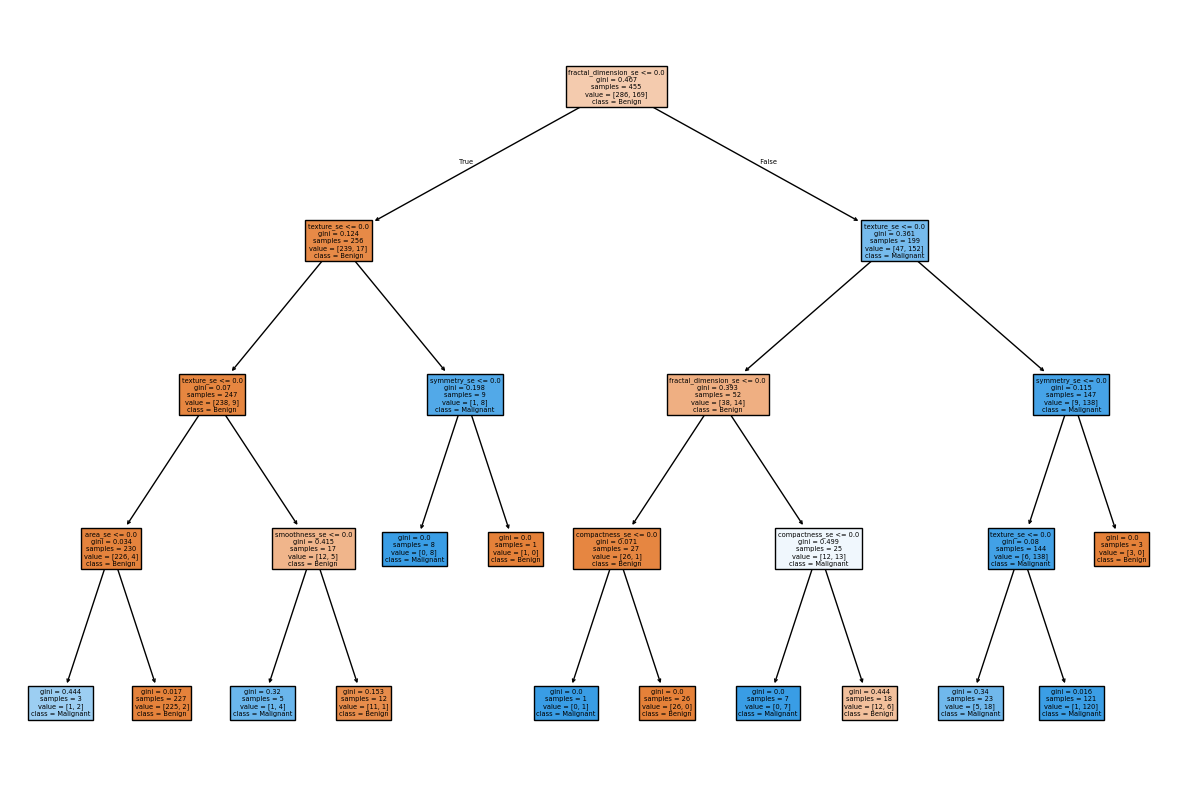

In [120]:
# plotting...
tmp = data.drop(columns = ['isMalignant'])

allFeatureNames = tmp.columns

plt.figure(figsize=(15, 10))
plot_tree(decisionTree, filled=True, feature_names=allFeatureNames, class_names=["Benign", "Malignant"])
plt.show()

Parameter Settings 3:

setting depth to 5...

In [121]:
decisionTree = DecisionTreeClassifier(max_depth=5, random_state=45, splitter = "best")
decisionTree.fit(X_train, y_train)

y_pred = decisionTree.predict(X_test)

In [122]:
# confusion matrix and other evaluation metrics...

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[66  5]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        71
           1       0.89      0.98      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



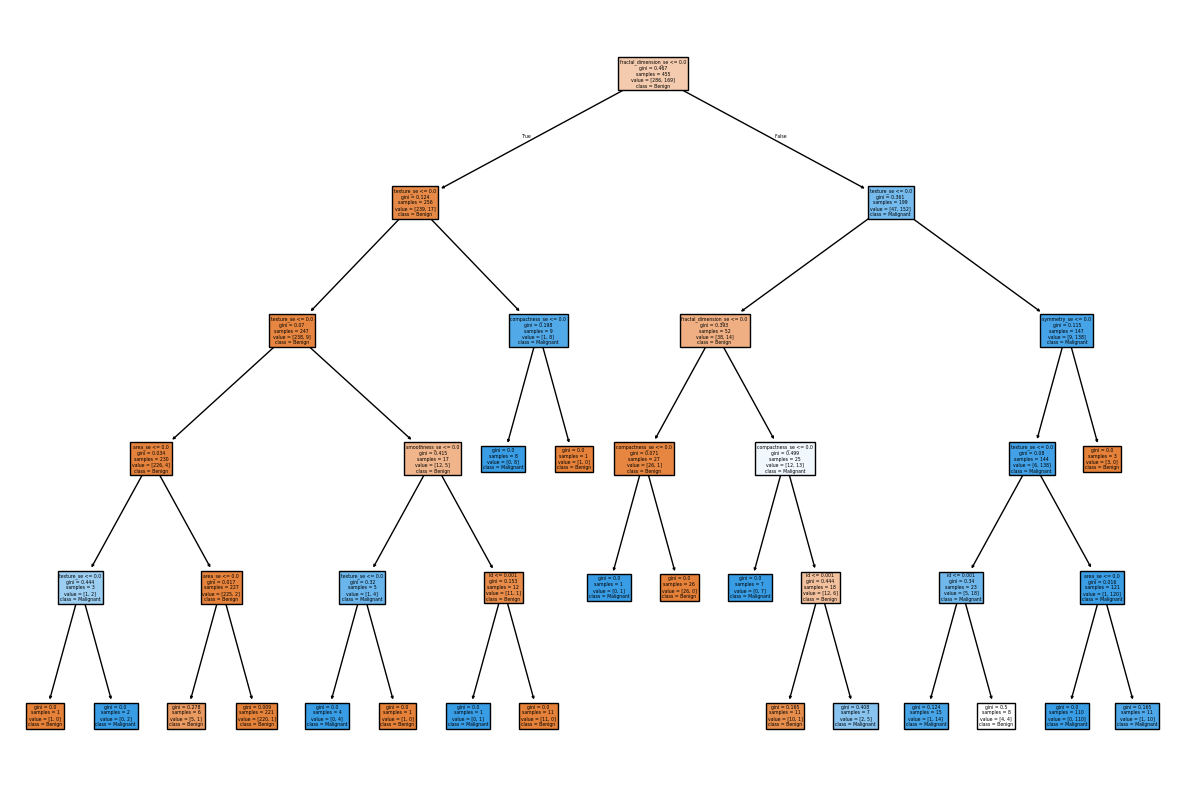

In [123]:
# plotting...
tmp = data.drop(columns = ['isMalignant'])

allFeatureNames = tmp.columns

plt.figure(figsize=(15, 10))
plot_tree(decisionTree, filled=True, feature_names=allFeatureNames, class_names=["Benign", "Malignant"])
plt.show()

ANALYSIS

Initially, I had tweaked my parameters in other aspects like "splitter". Eventually, I decided to only vary one factor which was "max_depth". This is because I wanted to explore the behavior of how we fit the model based on the complexity / depth of the model.

This behavior is exactly what we see with the 3 parameter changes:
- for a max depth of 3, we observe that the accuracy and f1 scores are .94.
- for a max depth of 4, we observe that the accuracy and f1 scores are .96
- for a max depth of 5, we observe that the accuracy and f1 scores are .95

As we learned in class, if the model is not complex enough, the model underfits the data, as seen with a max depth of 3. However, when we increase complexity, the model now risks overfitting by capturing noise, as seen with a max depth of 5. This explains why a max depth of 4 is the "sweet spot", having the highest accuracy and f1 score.

Thus, we conclude these results are consistent with the theory taught in class.

1.2...

In [124]:
# excluding "y" column for X matrix...
tmp = data.drop(columns = ['isMalignant'])
dataNum = tmp.select_dtypes(include='number')

allMeanVals = dataNum.mean()


# we will perform sensativity analysis by fixing the mean of all variables except 2, in which we vary based on their stdevs...
target1 = "fractal_dimension_se"
target2 = "symmetry_se"

stdTexture = dataNum[target1].std()
stdCompactness = dataNum[target2].std()


if False:
  print(allMeanVals["texture_se"], stdTexture)
  print(allMeanVals["compactness_se"], stdCompactness)

In [125]:
# creating grid range: +/- 2 standard deviations around mean...
f1_vals = np.linspace(allMeanVals[target1] - 2*stdTexture, allMeanVals[target1] + 2*stdTexture, 100)
f2_vals = np.linspace(allMeanVals[target2] - 2*stdCompactness, allMeanVals[target2] + 2*stdCompactness, 100)

# creating meshgrid...
F1, F2 = np.meshgrid(f1_vals, f2_vals)

# preparing input for prediction...
X_grid = []

for f1, f2 in zip(F1.ravel(), F2.ravel()):
    x_row = allMeanVals.copy()
    x_row[target1] = f1
    x_row[target2] = f2
    X_grid.append(x_row.values)

X_grid = np.array(X_grid)

In [126]:
Z = decisionTree.predict(X_grid)

# reshaping...
Z = Z.reshape(F1.shape)


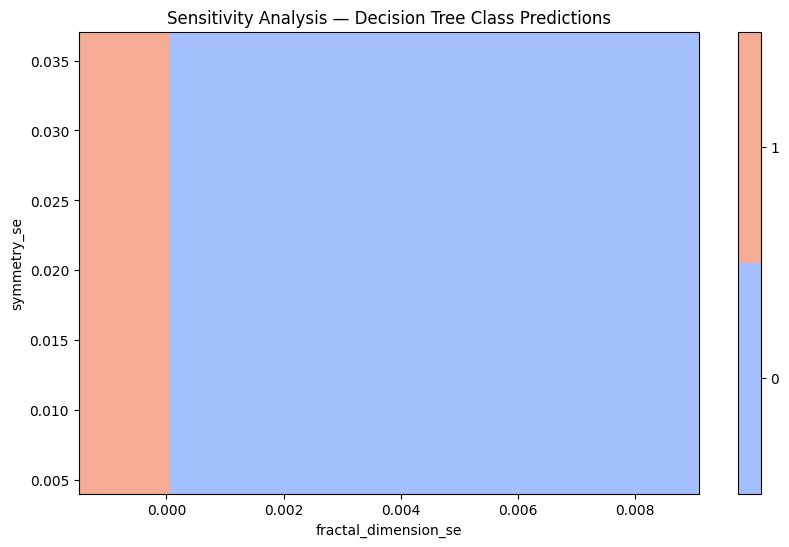

In [127]:
# plotting...
if False:
  plt.figure(figsize=(10, 6))
  contour = plt.contourf(F1, F2, Z, cmap='coolwarm', alpha=0.7)
  plt.colorbar(contour)

  plt.xlabel(target1)
  plt.ylabel(target2)
  plt.title("Sensitivity Analysis — Decision Tree Predictions")
  plt.show()

else:
  plt.figure(figsize=(10, 6))
  plt.contourf(F1, F2, Z, cmap='coolwarm', levels=[-0.5, 0.5, 1.5], alpha=0.8)
  plt.xlabel(target1)
  plt.ylabel(target2)
  plt.title("Sensitivity Analysis — Decision Tree Class Predictions")
  plt.colorbar(ticks=[0, 1])
  plt.show()


I used Google AI summary (as well as checking out the linked articles such as the following) in helping me understand what sensitivity analysis is:
- https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/1471-2288-13-92#:~:text=Sensitivity%20Analysis%20(SA)%20is%20defined,references%20%5B4%E2%80%937%5D.
- https://gocardless.com/guides/posts/what-is-sensitivity-analysis/#:~:text=Sensitivity%20analysis%20is%20a%20financial,posing%20'what%20if'%20questions.



To my understanding, sensitivty analysis is used to help further understand how variations in the input values affect the overall output of the model.

I performed sensitivity analysis by varying two input features, particularly
fractal_dimension_se and symmetry_se, while keeping all other features fixed at their mean. The choice of features was rather arbitrary, and at first, I started with "texture_se" and "compactness_se" but those did not seem to give me a desirable outcome that I could interpret.

The way I varied these my two target input features was by mean +/- 2 standard deviations and then using a contour plot as shown above. This graph illustrates that "fractal_dimension_se" is a much more significant factor when it comes to the decision tree class predictions as opposed to "symmetry_se". This is because it causes our model to flip from predicting a 1 to predicting a 0, as indicated by the "vertical line" that separates the two colors of red and blue. Conversely, symmetry_se does not affect the model too much since it does not flip the value our model predicts, as for all the values that were varied for this feature, the model still predicts 1.


TASK2 START...

In [128]:
# precision metrics used...
scoring = ['accuracy', 'precision', 'recall', 'f1']

Bagging method chosen:

Random forest algorithm...

In [129]:
# defining the model
rfc = RandomForestClassifier(n_estimators=500, random_state=0, class_weight='balanced')

In [130]:
# 5 splits for k-fold...
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfc = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=0)

cv_results_rfc = cross_validate(rfc, X, Y, cv=cv, scoring=scoring)

for metric in scoring:
    mean_val = np.mean(cv_results_rfc[f'test_{metric}'])
    print(f"RFC {metric.capitalize()}: {mean_val:.4f}")

RFC Accuracy: 0.9473
RFC Precision: 0.9479
RFC Recall: 0.9101
RFC F1: 0.9273


In [131]:
# 10 splits for k-fold...
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rfc = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=0)

cv_results_rfc = cross_validate(rfc, X, Y, cv=cv, scoring=scoring)

for metric in scoring:
    mean_val = np.mean(cv_results_rfc[f'test_{metric}'])
    print(f"RFC {metric.capitalize()}: {mean_val:.4f}")

RFC Accuracy: 0.9367
RFC Precision: 0.9429
RFC Recall: 0.8861
RFC F1: 0.9122


In [132]:
# 15 splits for k-fold...
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
rfc = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=0)

cv_results_rfc = cross_validate(rfc, X, Y, cv=cv, scoring=scoring)

for metric in scoring:
    mean_val = np.mean(cv_results_rfc[f'test_{metric}'])
    print(f"RFC {metric.capitalize()}: {mean_val:.4f}")

RFC Accuracy: 0.9367
RFC Precision: 0.9387
RFC Recall: 0.8908
RFC F1: 0.9121


Boosting method chosen:

Gradient Boosting algorithm...

In [133]:
# defining the model
gbc = GradientBoostingClassifier(n_estimators=500, random_state=0)

In [134]:
# 5 splits for k-fold...
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=500, random_state=0)

cv_results_gbc = cross_validate(gbc, X, Y, cv=cv, scoring=scoring)

for metric in scoring:
    mean_val = np.mean(cv_results_gbc[f'test_{metric}'])
    print(f"GBC {metric.capitalize()}: {mean_val:.4f}")


GBC Accuracy: 0.9279
GBC Precision: 0.9040
GBC Recall: 0.9055
GBC F1: 0.9034


In [135]:
# 10 splits for k-fold...
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=500, random_state=0)

cv_results_gbc = cross_validate(gbc, X, Y, cv=cv, scoring=scoring)

for metric in scoring:
    mean_val = np.mean(cv_results_gbc[f'test_{metric}'])
    print(f"GBC {metric.capitalize()}: {mean_val:.4f}")


GBC Accuracy: 0.9473
GBC Precision: 0.9373
GBC Recall: 0.9242
GBC F1: 0.9291


In [136]:
# 15 splits for k-fold...
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=500, random_state=0)

cv_results_gbc = cross_validate(gbc, X, Y, cv=cv, scoring=scoring)

for metric in scoring:
    mean_val = np.mean(cv_results_gbc[f'test_{metric}'])
    print(f"GBC {metric.capitalize()}: {mean_val:.4f}")


GBC Accuracy: 0.9438
GBC Precision: 0.9334
GBC Recall: 0.9197
GBC F1: 0.9244


ANALYSIS

I used the following articles to help me understand more about stratified k-fold cross validation:
- https://qiita.com/KROYO/items/608c15f9c550417b217f
- https://qiita.com/KROYO/items/66d613356e2bf4cf9fed

For the Bagging ensemble method, I chose Random Forest Classifier. We observe the following:
- for n_splits = 5, all evaluation metrics are the highest
- for n_splits = 10, all evaluation metrics are the second highest
- for n_splits = 15, all evaluation metrics are the lowest

These results suggest that there is an inverse relationship between number of splits and high evaluation metrics like accuracy. That is, the higher the splits, the lower the accuracy. However, it is worth noting that n = 10 splits and n = 15 splits have quite similar results, suggesting some sort of "saturation". Since as k increases, the size of each validation set becomes smaller, perhaps this causes more challenging validation due to the fact that we are evaluating on more unique data "slices". As such, the RFC may overfit more as number of splits increase, which is why we see the downward trend in the metrics.




For the Boosting ensemble method, I chose Gradient Boosting. We observe the following:
- for n_splits = 5, all evaluation metrics are the lowest
- for n_splits = 10, all evaluation metrics are the highest
- for n_splits = 15, all evaluation metrics are slightly lower than n_splits = 10

These results show that when the model has more splits (n = 10), it tends to fit the data better, but after a certain point of too many splits (n = 15), it overfits the data. In relating this to the Bias-Variance tradeoff discussed in class, the results suggest that too many splits causes overfitting which causes more variance (and less bias). Meanwhile, too little splits causes underfitting which causes more bias (and less variance).

TASK3 START...

In [137]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in cv.split(X, Y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]
    break

# training model...
model = RandomForestClassifier(n_estimators=500, class_weight='balanced')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# confusion matrix...
print(confusion_matrix(y_test, predictions))
# TN FP
# FN TP

[[69  2]
 [ 2 41]]


In [138]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in cv.split(X, Y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]
    break

# training model...
model = GradientBoostingClassifier(n_estimators=500, random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# confusion matrix...
print(confusion_matrix(y_test, predictions))
# TN FP
# FN TP

[[65  6]
 [ 2 41]]


In [139]:
rfc = RandomForestClassifier(n_estimators=500)
gbc = GradientBoostingClassifier(n_estimators=500)

scores_rfc = cross_val_score(rfc, X, Y, cv=5, scoring='accuracy')
scores_gbc = cross_val_score(gbc, X, Y, cv=5, scoring='accuracy')

print("RFC:", scores_rfc)
print("GBC:", scores_gbc)

# paired t-test...
t_stat, p_value = ttest_rel(scores_rfc, scores_gbc)
print(f"Paired t-test: t={t_stat:.4f}, p={p_value:.4f}")


RFC: [0.90350877 0.92105263 0.94736842 0.90350877 0.95575221]
GBC: [0.89473684 0.89473684 0.93859649 0.92982456 0.95575221]
Paired t-test: t=0.4082, p=0.7040


ANALYSIS

The selected fold I chose is 5 splits.

Resource I used: https://www.southampton.ac.uk/passs/gcse_scores/bivariate_analysis/t_test.page#:~:text=If%20a%20p%2Dvalue%20reported,then%20the%20result%20is%20insignificant.

Regarding the paired t-test, a p-value above .05 means that we fail to reject the null hypothesis. What this indicates is that there isn't a statistically significant difference between the two models. In the context of our results, we observe that Random Forest was "better" than Gradient Boosting, having predicted fewer or same False Negatives and False Positives. However, this increase in performance is not significant, as indicated by the paired t-test.

As aforementioned in my TASK 2 analysis, it seemed that with Random Forest, the model tended to overfit when we increased the number of folds. Thus, for n = 5 splits, we had less overfitting. As such, this means that we had less variance (but still likely more variance and less bias than Gradient Bossting). With Gradient Boosting, we observed that for n = 5 splits, the model seemed to underfit the data. As such, it means that this model had more bias and less variance than Random Forest. To sum, these results highlight that both Random Forest and Gradient Boosting seem to be on "opposite" sides of the Bias Variance Tradeoff, in which Random Forest struggles more with overfitting the data and Gradient Boosting struggles more with underfitting.